# THE SPARKS FOUNDATION

# I am Kunal Gaur intern at The Sparks Foundation

# TASK - PREDICTION USING SUPERVISED ML
# predict the percentage of the student based on the number of study hours
# What will be predicted scoreif a student studiesfor 9.25 hrs/day?

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
#import data 
df=pd.read_csv(r"C:\Users\dell\Desktop\data.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#checking is their is any null value present in our dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#see the rows and columns of the dataset
df.shape

(25, 2)

# Visualization

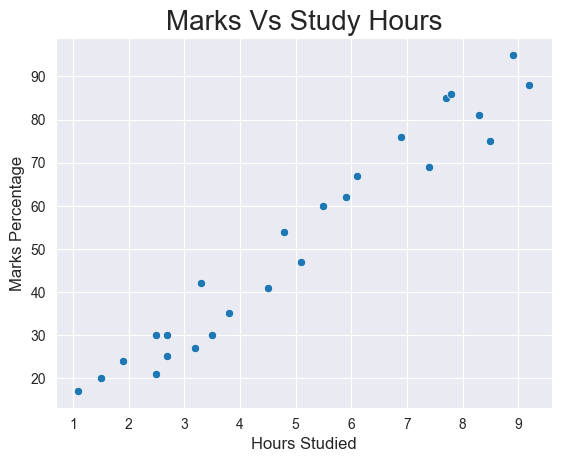

In [9]:
#Visualization of the dataset

sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

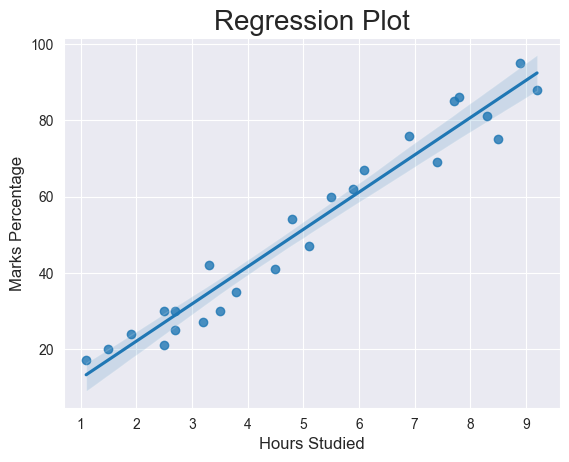

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [10]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(df.corr())

Train-Test Split

1] splitting data

In [12]:
# Defining X and y from the Data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# 2) Fitting the Data into the model

In [13]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Trained")

Model Trained


Predicting the Percentage of Marks

In [14]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


Comparing the Predicted Marks with the Actual Marks

In [15]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Visually Comparing the Predicted Marks with the Actual Marks

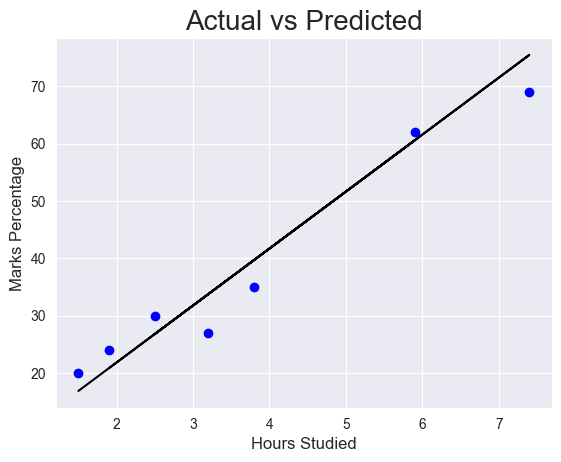

In [16]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

Evaluating the Model

In [17]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


# Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [18]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


# As aresult of the model predicted, if student study 9.25hrs/day is got 93.893